## Observations and Insights

## Dependencies and starter code

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st


# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
merged_df=pd.merge(mouse_metadata, study_results, on="Mouse ID")
merged_df.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


## Summary statistics

In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


## Bar plots

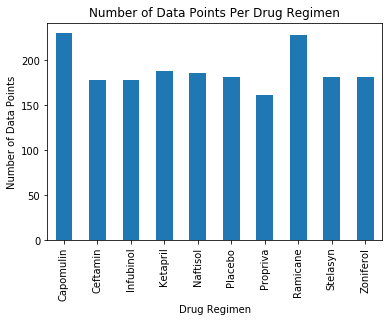

In [17]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
tumor_data_point=merged_df.groupby("Drug Regimen")["Metastatic Sites"].count()

tumor_chart=tumor_data_point.plot(kind="bar")

tumor_chart.set_ylabel("Number of Data Points")
tumor_chart.set_title("Number of Data Points Per Drug Regimen")
plt.show()

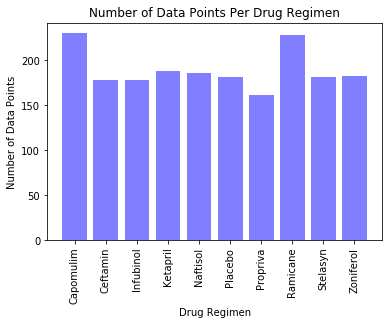

In [18]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
meta_sites=[230,178,178,188,186,181,161,228,181,182]
drug_regimen=np.arange(len(meta_sites))

tick_locations= [value for value in drug_regimen]
plt.xticks(tick_locations,
           ["Capomulim", "Ceftamin", "Infubinol", "Ketapril", "Naftisol",
            "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"],
          rotation="vertical")

plt.bar(drug_regimen, meta_sites, color="b", alpha=0.5, align="center")

plt.title("Number of Data Points Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.show()

## Pie plots

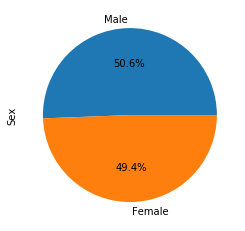

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_pie=merged_df["Sex"].value_counts()

gender_pie.plot(kind="pie", autopct="%1.1f%%")

plt.show()

Text(0, 0.5, 'Sex')

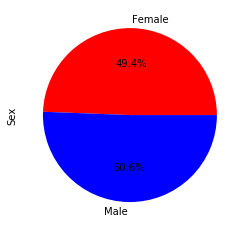

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels=["Female", "Male"]
sizes=["935", "958"]
colors=["Red", "Blue"]
explode= (0,0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%")
plt.ylabel("Sex")

## Quartiles, outliers and boxplots

## Line and scatter plots

In [21]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
final_tumor_df= merged_df.groupby(["Mouse ID"]).max()
final_tumor_df= final_tumor_df.reset_index("Mouse ID")
final_tumor_df= final_tumor_df[["Mouse ID", "Timepoint"]]
final_tumor_df= pd.merge(final_tumor_df, merged_df, on=["Mouse ID", "Timepoint"], how="left")

final_tumor_df= final_tumor_df.loc[(final_tumor_df["Drug Regimen"]=="Capomulin") | 
                                   (final_tumor_df["Drug Regimen"]=="Ramicane")| 
                                   (final_tumor_df["Drug Regimen"]=="Infubinol")|
                                   (final_tumor_df["Drug Regimen"]=="Ceftamin")
                                  ]

final_tumor_df=final_tumor_df.set_index(["Drug Regimen"])
final_tumor_df.head()


,Mouse ID,Timepoint,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Infubinol,a203,45,Female,20,23,67.973419,2
Infubinol,a251,45,Female,21,25,65.525743,1
Ceftamin,a275,45,Female,20,28,62.999356,3
Ramicane,a411,45,Male,3,22,38.407618,1
Ramicane,a444,45,Female,10,25,43.047543,0


In [22]:
tumor_volume_capo= final_tumor_df.loc["Capomulin","Tumor Volume (mm3)"]
quartiles = tumor_volume_capo.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The IQR is {iqr}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The IQR is 7.781863460000004
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [23]:
tumor_volume_ram= final_tumor_df.loc["Ramicane","Tumor Volume (mm3)"]
quartiles = tumor_volume_ram.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The IQR is {iqr}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The IQR is 9.098536719999998
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [24]:
tumor_volume_inf= final_tumor_df.loc["Infubinol","Tumor Volume (mm3)"]
quartiles = tumor_volume_inf.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The IQR is {iqr}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The IQR is 11.477135160000003
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [25]:
tumor_volume_ceft= final_tumor_df.loc["Ceftamin","Tumor Volume (mm3)"]
quartiles = tumor_volume_ceft.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The IQR is {iqr}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The IQR is 15.577752179999997
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse_id_df=merged_df.set_index("Mouse ID")
capomulin_mouse=input("What is the Mouse ID that was treated with Capomulin?")

timepoint=[0,5,10,15,20,25,30,35,40,45]
tumor_volume=mouse_id_df.loc[capomulin_mouse,["Tumor Volume (mm3)"]]

plt.plot(timepoint, tumor_volume, color="green")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse " + capomulin_mouse)

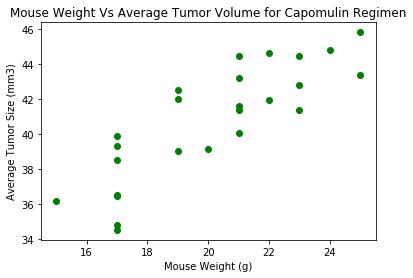

In [28]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
drug_df=merged_df.groupby(["Drug Regimen","Mouse ID"])

avg_tumor_volume=pd.DataFrame(drug_df["Tumor Volume (mm3)"].mean())
avg_tumor_volume_capo=avg_tumor_volume.loc["Capomulin"]

weight_df=pd.DataFrame(drug_df["Weight (g)"].mean())
weight_capo=weight_df.loc["Capomulin"]

plt.scatter(weight_capo, avg_tumor_volume_capo, marker="o", facecolors="green")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Size (mm3)")
plt.title("Mouse Weight Vs Average Tumor Volume for Capomulin Regimen")
plt.show()

In [ ]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

coef=round(st.pearsonr(weight_capo["Weight (g)"],avg_tumor_volume_capo["Tumor Volume (mm3)"])[0],2)
print(f"The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is {coef}")
                                                                                                                      
(slope, intercept, rvalue, pvalue, stderr)= linregress(weight_capo["Weight (g)"], avg_tumor_volume_capo["Tumor Volume (mm3)"])
regress_values= weight_capo * slope + intercept
line_eq= "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight_capo, avg_tumor_volume_capo, marker="o", facecolors="green")
plt.plot(weight_capo, regress_values, "r-")
plt.annotate(line_eq,(34, 46),fontsize=15,color="red")
plt.xlabel("Mouse Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Weight Vs Average Tumor Volume for Capomulin with Regression Line")
plt.show